In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unggah file secara manual di Google Colab sebelum menjalankan ini
from google.colab import files
uploaded = files.upload()

# Baca file (sesuaikan dengan nama file yang diunggah)
file_name = list(uploaded.keys())[0]
df = pd.ExcelFile(file_name).parse('Sheet1')

# Bersihkan data
df_cleaned = df.iloc[2:].reset_index(drop=True)
df_cleaned.columns = ["Provinsi", "2021", "2022", "2023"]
df_cleaned = df_cleaned.dropna().reset_index(drop=True)

# Ubah data ke tipe numerik
df_cleaned["2021"] = pd.to_numeric(df_cleaned["2021"], errors="coerce")
df_cleaned["2022"] = pd.to_numeric(df_cleaned["2022"], errors="coerce")
df_cleaned["2023"] = pd.to_numeric(df_cleaned["2023"], errors="coerce")

# Menampilkan 10 data pertama
df_cleaned.head(10)



Saving Tenaga Listrik yang Dibangkitkan Menurut Provinsi, 2021-2023.xlsx to Tenaga Listrik yang Dibangkitkan Menurut Provinsi, 2021-2023 (2).xlsx


,Provinsi,2021,2022,2023
0,ACEH,3001.78,3175.52,3514.18
1,SUMATERA UTARA,17027.65,19155.31,18227.36
2,SUMATERA BARAT,4396.18,3793.19,4072.56
3,RIAU,5028.96,6102.26,6132.59
4,JAMBI,730.00,811.27,649.02
5,SUMATERA SELATAN,11019.15,11239.63,12813.45
6,BENGKULU,2689.06,2730.75,2402.80
7,LAMPUNG,5436.19,5630.72,5510.49
8,KEP. BANGKA BELITUNG,1498.09,1262.73,1159.43
9,KEP. RIAU,3740.80,4111.73,4440.21


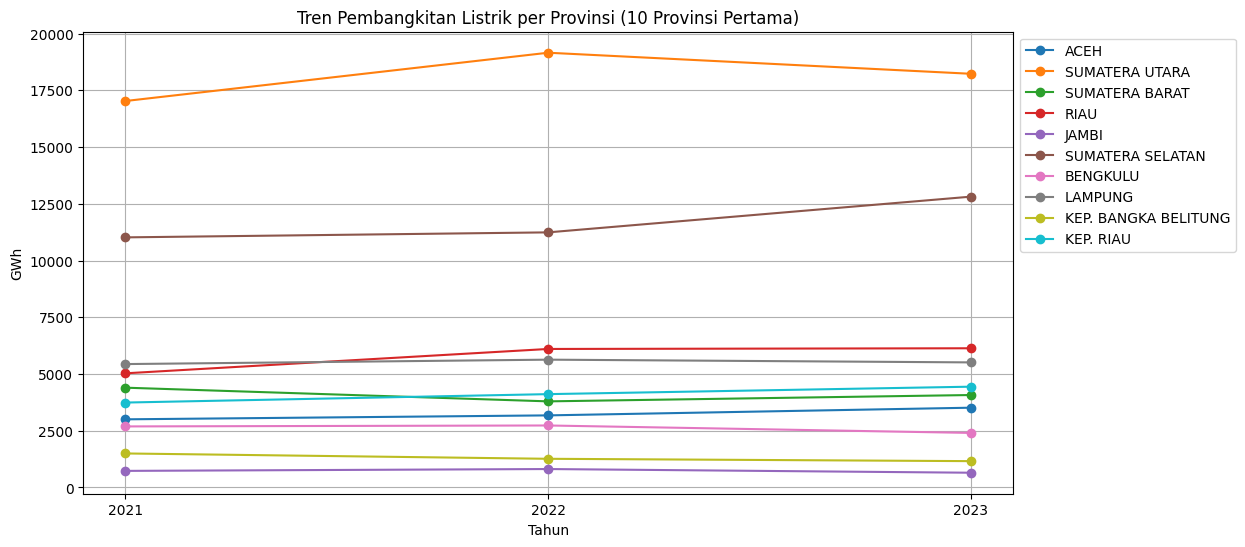

In [ ]:
# 1. Visualisasi Menunjukkan tren perubahan pembangkitan listrik per provinsi (Diagram Garis)
plt.figure(figsize=(12, 6))
for prov in df_cleaned["Provinsi"][:10]:  # Ambil 10 provinsi pertama untuk kejelasan
    plt.plot(["2021", "2022", "2023"], df_cleaned[df_cleaned["Provinsi"] == prov].iloc[:, 1:].values.flatten(), marker='o', label=prov)

plt.title("Tren Pembangkitan Listrik per Provinsi (10 Provinsi Pertama)")
plt.xlabel("Tahun")
plt.ylabel("GWh")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

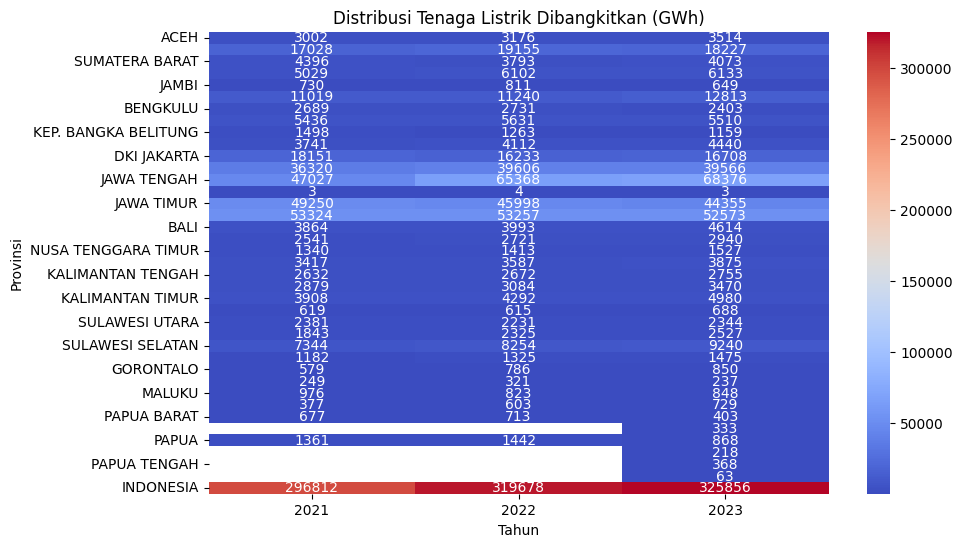

In [ ]:
#2. Untuk melihat distribusi pembangkitan listrik antar tahun dengan warna (Heatmap)
plt.figure(figsize=(10, 6))
heatmap_data = df_cleaned.set_index("Provinsi")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Distribusi Tenaga Listrik Dibangkitkan (GWh)")
plt.xlabel("Tahun")
plt.ylabel("Provinsi")
plt.show()

<ipython-input-4-ba024a9bef24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tahun", y="GWh", data=df_melted, palette="Set2")


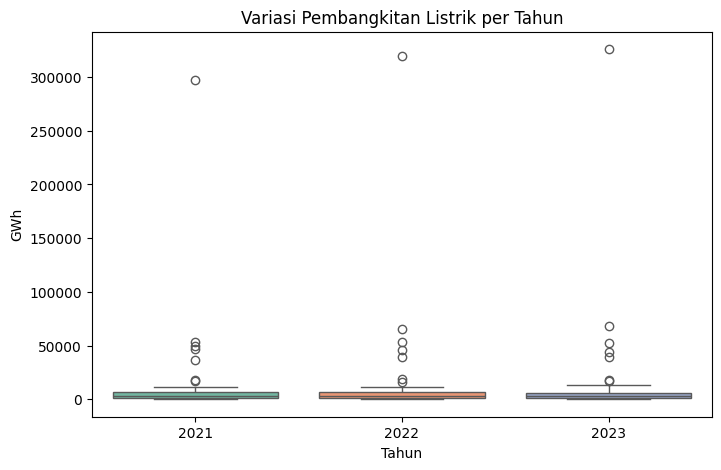

In [ ]:
#3. Untuk melihat variasi pembangkitan listrik antar provinsi (Boxplot)
plt.figure(figsize=(8, 5))
df_melted = df_cleaned.melt(id_vars=["Provinsi"], var_name="Tahun", value_name="GWh")
sns.boxplot(x="Tahun", y="GWh", data=df_melted, palette="Set2")
plt.title("Variasi Pembangkitan Listrik per Tahun")
plt.show()

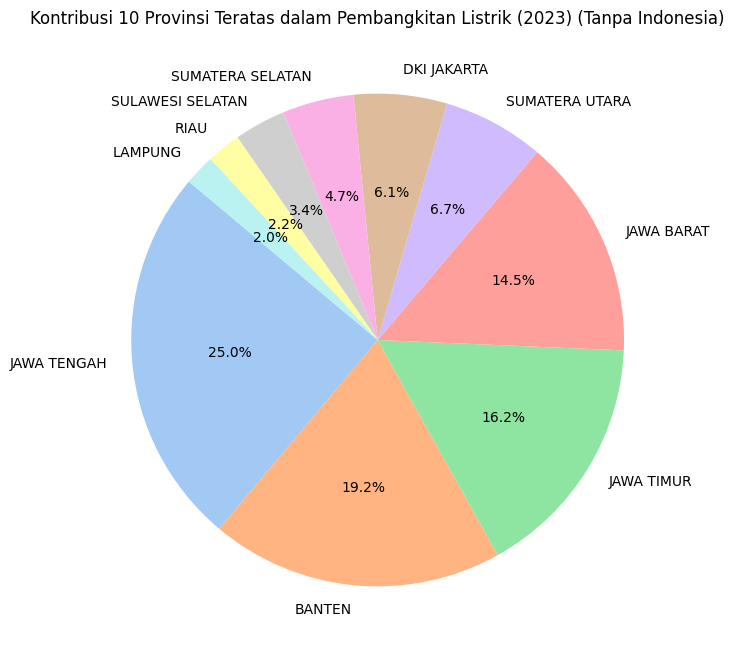

In [11]:
# 4.Perbandingan Pembangkitan Listrik 2021-2023 per Provinsi (Pie Chart)

# Visualisasi Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(top_10["2023"], labels=top_10["Provinsi"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Kontribusi 10 Provinsi Teratas dalam Pembangkitan Listrik (2023) (Tanpa Indonesia)")
plt.show()
